In [9]:
import tensorflow as tf

In [10]:
tf.__version__

'2.5.0'

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


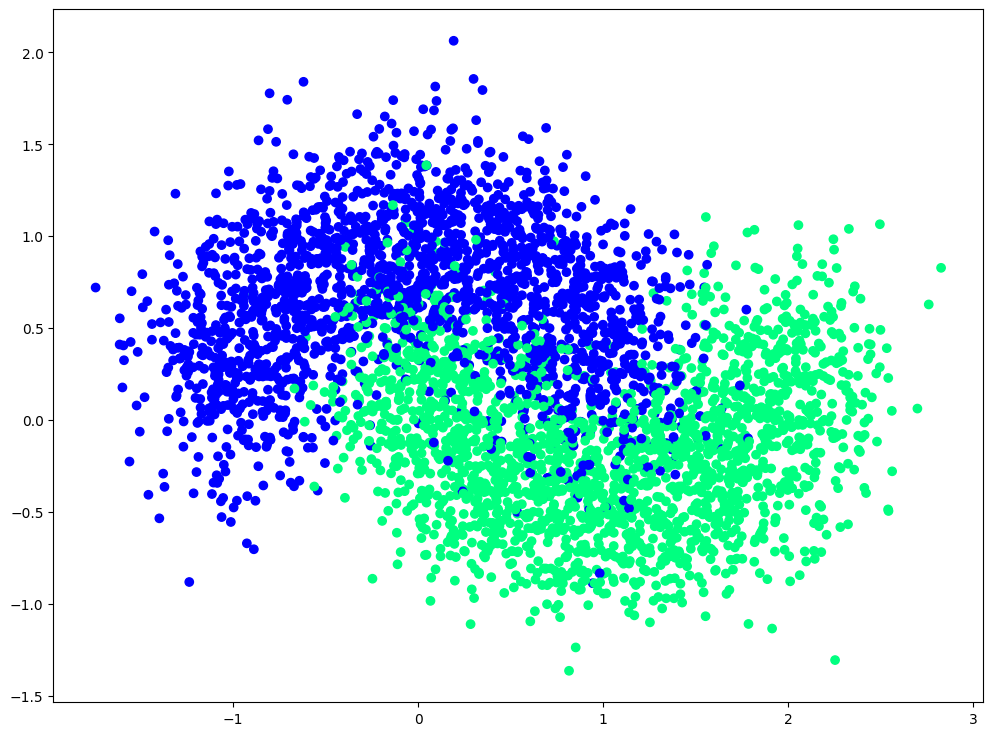

In [24]:
N = 4000
x, t = datasets.make_moons(N, noise=0.3)

plt.figure(figsize=(12,9))
plt.scatter(x[:,0], x[:,1], c=t, cmap=plt.cm.winter)
t = t.reshape(N,1)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, t, test_size=0.2)

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model

In [28]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [29]:
np.random.seed(123)
tf.random.set_seed(123)

In [30]:
hidden_size = 10
output_dim = 1
EPOCHS = 100
batch_size = 100
learning_rate = 0.1

In [31]:
class Feed_Forward_Net(Model):
    def __init__(self, hidden_size, output_dim):
        super().__init__()
        self.l1 = Dense(hidden_size, activation='sigmoid')
        self.l2 = Dense(output_dim, activation='sigmoid')
    
    def call(self, x):
        h = self.l1(x)
        y = self.l2(h)
        
        return y

In [32]:
model = Feed_Forward_Net(hidden_size, output_dim)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-22 19:51:42.744262: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-22 19:51:42.744715: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [33]:
optimizer = optimizers.SGD(learning_rate=learning_rate)

In [34]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(X_train, Y_train, epochs=100, batch_size=batch_size, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3301 - accuracy: 0.8528
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3299 - accuracy: 0.8522
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3299 - accuracy: 0.8528
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3298 - accuracy: 0.8525
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3298 - accuracy: 0.8516
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.8522
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3298 - accuracy: 0.8531
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.8534
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3296 - accuracy: 0.8528
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3298 - accuracy: 0.8519
Epoch 11/

In [42]:
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('test_loss : {:.3f}, test_acc : {:.3f}'.format(loss, acc))

25/25 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.8375
test_loss : 0.347, test_acc : 0.837
